# Getting Started with conx

## What is conx?

`conx` is an accessible and powerful way to build and understand deep learning neural networks. Specifically, it sits on top of Keras, which sits on top of Theano, TensorFlow, or CNTK. 

`conx`:

* has an easy to use interface for creating connections between layers of a neural network
* adds additional functionality for manipulating neural networks
* supports visualizations and analysis for training and using neural networks
* has everything you need; doesn't require knowledge of complicated numerical or plotting libraries
* integrates with lower-level (Keras) if you wish

But rather than attempting to explain each of these points, let's demonstrate them.

This demonstration is being run in a Jupyter Notebook. `conx` doesn't require running in the notebook, but if you do, you will be able to use the visualizations and dashboard.

## A Simple Network

As a demonstration, let's build a simple networkd for learning the XOR (exclusive or) truth table. XOR is defined as:

Input | Output
------|-------
 0, 0 | 0
 0, 1 | 1
 1, 0 | 1
 1, 1 | 0

### Step 1: import conx

We will need the Network, and Layer classes from the conx module:

In [1]:
from conx import Network, Layer

conx, version 3.4.3
Using Theano backend.


### Step 2: create the network

Every network needs a name:

In [2]:
net = Network("XOR Network")

### Step 3: add the needed layers

Every layer needs a name and a size. We add each of the layers of our network. The first layer will be an "input" layer (named "input1"). We only need to specify the size. For our XOR problem, there are two inputs:

In [3]:
net.add(Layer("input1", 2))

For the next layers, we will also use the default layer type for hidden and output layers. However, we also need to specify the function to apply to the "net inputs" to the layer, after the matrix multiplications. We have a few choices for which activation functions to use:

* 'relu'
* 'sigmoid'
* 'linear'
* 'softmax'
* 'tanh'
* 'elu'
* 'selu'
* 'softplus'
* 'softsign'
* 'hard_sigmoid'

You can try any of these. "relu" is short for Rectified Linear Unit and is known for being generally useful for hidden layer activations. Likewise, the sigmoid function is generally useful for output layer activation functions. We'll try those, respectively, but you can experiment.

In [4]:
net.add(Layer("hidden1", 5, activation="relu"))
net.add(Layer("output1", 1, activation="sigmoid"))

### Step 4: connect the layers

We connect up the layers as needed. This is a simple 3-layer network:

In [5]:
net.connect("input1", "hidden1")
net.connect("hidden1", "output1")

**Note**:

We use the term `layer` here because each of these items composes the layer itself. In general though, a layer can be composed of many of these items. In that case, we call such a layer a `bank`.

### Step 5: compile the network

Before we can do this step, we need to do two things:

1. tell the network how to compute the error between the targets and the actual outputs
2. tell the network how to adjust the weights when learning

#### Error (or loss)

The first option is called the `error` (or `loss`). There are many choices for the error function, and we'll dive into each later. For now, we'll just briefly mention them:

* "mse" - mean square error
* "mae" - mean absolute error
* "mape" - mean absolute percentage error
* "msle" - mean squared logarithmic error
* "kld" - kullback leibler divergence
* "cosine" - cosine proximity

#### Optimizer

The second option is called "optimizer". Again, there are many choices, but we just briefly name them here:

* "sgd" - Stochastic gradient descent optimizer
* "rmsprop" - RMS Prop optimizer
* "adagrad" - ADA gradient optimizer
* "adadelta" - ADA delta optimizer
* "adam" - [Adam optimizer](http://arxiv.org/abs/1412.6980v8)
* "adamax" - Adamax optimizer from Adam
* "nadam" - Nesterov Adam optimizer
* "tfoptimizer" - a native TensorFlow optimizer

For now, we'll just pick "mse" for the error function, and "adam" for the optimizer. 

And we compile the network:

In [6]:
net.compile(error="mse", optimizer="adam")

#### Option: visualize the network

At this point in the steps, you can see a visual representation of the network by simply evaluating the network:

In [7]:
net

<IPython.core.display.Javascript object>

<Network name='XOR Network' (compiled)>

This is useful to see the layers and connections.

In [8]:
net.propagate([1, 0])

[0.5424782633781433]

Propagating the network should show some colored squares in the layers in the above image. We can try any input vector:

In [9]:
net.propagate([0, 0])

[0.5]

In these visualizations, the more red a unit is, the more negative its value, and the more black, the more positive. Values close to zero will appear white.

Interestingly, if you propagate this network with zeros, then it will only have white activations. This means that there is no activation at any node in the network. This is because the bias units are initialized at zero.

Below, we propagate small, positive values which appear as light gray. Activations in the hidden layer may appear redish (negative) or grayish (positive).

In [10]:
net

<IPython.core.display.Javascript object>

<Network name='XOR Network' (compiled)>

### The dashboard

The dashboard allows you to interact, test, and generally work with your network via a GUI.

In [11]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=2, options=('input1', 'hidden1', 'output1'), rows=1, value='output1'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

### Step 6: setup the training data

For this little experiment, we want to train the network on our table from above. To do that, we add the inputs and the targets to the dataset, one at a time:

In [12]:
net.dataset.add([0, 0], [0])
net.dataset.add([0, 1], [1])
net.dataset.add([1, 0], [1])
net.dataset.add([1, 1], [0])

In [13]:
net.dataset.summary()

Input Summary:
   count  : 4 (4 for training, 0 for testing)
   shape  : [(2,)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 4 (4 for training, 0 for testing)
   shape  : [(1,)]
   range  : (0.0, 1.0)


### Step 7: train the network

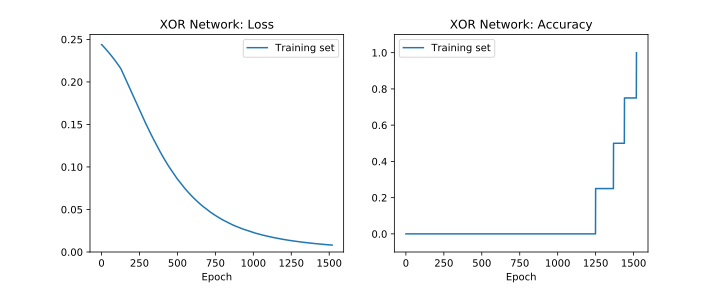

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 1519 |   0.00811 |   1.00000 


In [14]:
net.train(epochs=2000, accuracy=1.0, report_rate=100, plot=True)

Perhaps the network learned none, some, or all of the patterns. You can reset the network, and try again (retrain). Or continue with the following steps.

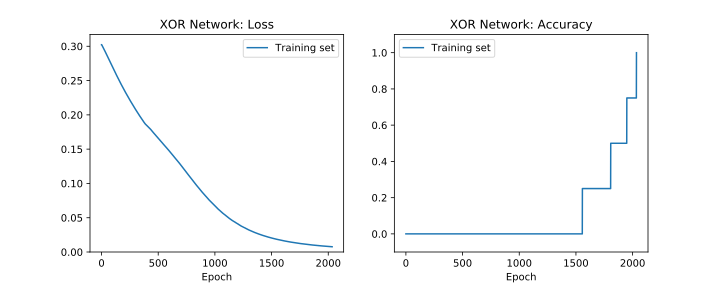

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 2034 |   0.00766 |   1.00000 


In [15]:
net.reset()
net.retrain(epochs=10000)

### Step 8: test the network

In [16]:
net.test()

Testing train dataset with tolerance 0.1000...
Total count: 1
      correct: 1
      incorrect: 0
Total percentage correct: 1.0


To see all of these activations flow through the network diagram above, you can run the following:

In [17]:
for pattern in net.dataset.inputs:
    net.propagate(pattern)

## conx options

### Propagation enhancements

There are five ways to propagate activations through the network:

* Network.propagate(`inputs`) - propagate these inputs through the network
* Network.propagate_to(`inputs`) - propagate these inputs to this bank (gets encoding)
* Network.propagate_from(`bank-name`, `activations`) - propagate the activations from `bank-name` to outputs
* Network.propagate_to_image(`bank-name`, `activations`, scale=SCALE)
* Network.propagate_to_features(`bank-name`, `activations`, scale=SCALE)

Note:

All of the propagate methods will visualize their activations in any non-snapshot network image in the notebook.

In [18]:
net.propagate_from("hidden1", [0, 1, 0, 0, 1])

[0.46572578]

In [19]:
net.propagate_to("hidden1", [0.5, 0.5])

[0.0, 0.0, 0.0, 0.32017982006073, 0.0]

In [20]:
net.propagate_to("hidden1", [0.5, 0.5])

[0.0, 0.0, 0.0, 0.32017982006073, 0.0]

There is also a propagate_to_image() that takes a bank name, and inputs.

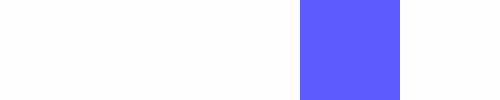

In [21]:
net.propagate_to_image("hidden1", [0.5, 0.5]).resize((500, 100))

### Plotting options

You can plot the following values from the training history:

* "loss" - error measure (eg, "mse", mean square error)
* "acc" - the accuracy of the training set

You can plot any subset of the above on the same plot:

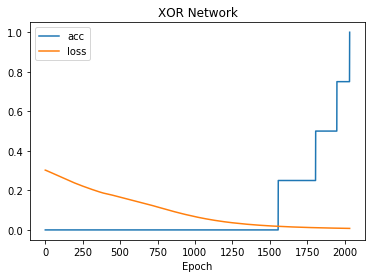

In [22]:
net.plot(["acc", "loss"])

You can also see the activations at a particular unit, given a range of input values for two input units. Since this network has only two inputs, and one output, we can see the entire input and output ranges:

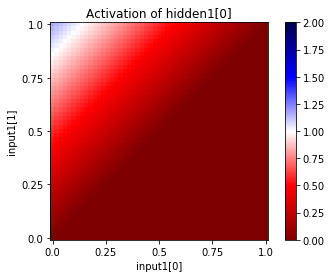

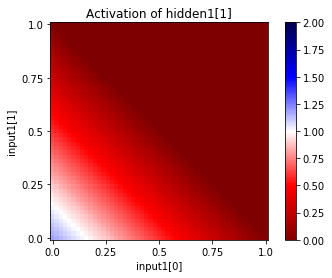

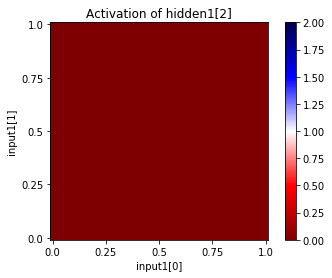

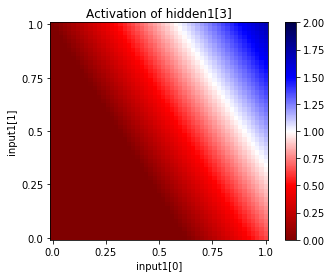

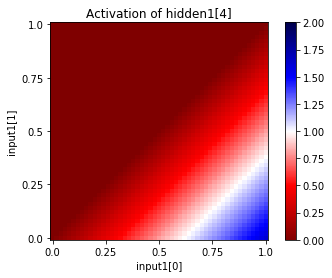

In [23]:
for i in range(net["hidden1"].size):
    net.plot_activation_map(from_layer="input1", from_units=(0,1),
                            to_layer="hidden1", to_unit=i)

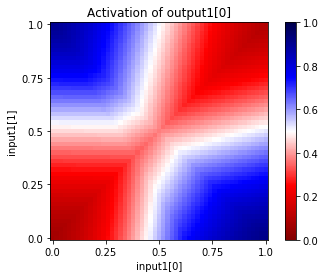

In [24]:
net.plot_activation_map(from_layer="input1", from_units=(0,1),
                        to_layer="output1", to_unit=0)